<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Prepare two test datasets
Pick a small set of values that enable you to apply clustering using pen&paper. Next create a fresh, or find an existing, large dataset. Use the Iris dataset, which is included in scikit-learn (generated using the below code snippet).
> Clarify why you believe your small dataset to be suitable for k-means clustering. Also make sure you report the source of your large dataset. 

In [334]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
sys.path.append('/usr/local/lib/python3.8/site-packages')

#from sklearn.datasets import load_iris
iris = datasets.load_iris()
#print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

## Task 2: Apply k-means clustering on paper
Work through your small dataset from Task 1 to ensure you have known-good results.
> Include information on how you sanity-checked your results as the number of iterations may considerably affect the precision of your final values.

## Task 3: Create a test harness
Start preparing your implementation by first setting up a test (without having an implementation just yet!). In this way, you will follow a _test-driven development_ approach. As part of this work, you may choose to compare to a reference implementation, like the one shown in the below code example.
> Identify suitable unit tests and integration tests. Explain what coverage you expect your test suite to have.

In [335]:
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for the full API
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## Task 4: Implement k-means clustering in Python
You are now set to actually add the implementation. Note that you are expected to fully implement the mathematical operations instead of using a library function such as `scikit` or `statsmodels`. Your implementation may make several assumptions about the inputs provided to it. Make those explicit in comments. Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.
> Correctly work on Python implementation
>> Describing limitations and assumptions of your implementation
>>> Description of the complexity of your algorithm.

In [336]:
iris.data
type(iris.data)

numpy.ndarray

In [337]:
type(iris.target)

numpy.ndarray

In [338]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [339]:
df1 = pd.DataFrame({
    'M': iris.data[:,0],
    'N': iris.data[:,1],
    'cluster1' : iris.target
})

In [340]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [341]:
df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


sepal length ,spal width mean vlue get as centroid

In [342]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [343]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

**Calculating distance and updating dataFrame**

In [360]:
def assignment(df, centroids):
    for i in range(3):
        ########################################### sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (np.sqrt((df['x'] - centroids[i][0]) ** 2+ (df['y'] - centroids[i][1]) ** 2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [361]:
df = assignment(df, centroids)

In [362]:
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.131782,1.059622,1.764836,0,r
1,4.9,3.0,0,0.422775,0.940801,1.914215,0,r
2,4.7,3.2,0,0.369305,1.201166,2.116492,0,r
3,4.6,3.1,0,0.509049,1.257023,2.212913,0,r
4,5.0,3.6,0,0.190237,1.200686,1.887407,0,r


***Updating the centroids***

In [350]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

**Once again use assignment function**

In [351]:
df = assignment(df, centroids)

In [352]:
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.147942,1.071654,1.755866,0,r
1,4.9,3.0,0,0.398346,0.956435,1.903325,0,r
2,4.7,3.2,0,0.359507,1.216416,2.106177,0,r
3,4.6,3.1,0,0.497731,1.272661,2.202305,0,r
4,5.0,3.6,0,0.217186,1.212803,1.878758,0,r


***Updating the centroids***

In [355]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
centroids

{0: [5.003921568627451, 3.409803921568628],
 1: [5.790384615384616, 2.696153846153846],
 2: [6.812765957446806, 3.0744680851063824]}

***Once again use assignment function***

In [356]:
df = assignment(df, centroids)

In [357]:
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.131782,1.059622,1.764836,0,r
1,4.9,3.0,0,0.422775,0.940801,1.914215,0,r
2,4.7,3.2,0,0.369305,1.201166,2.116492,0,r
3,4.6,3.1,0,0.509049,1.257023,2.212913,0,r
4,5.0,3.6,0,0.190237,1.200686,1.887407,0,r


## Task 5: Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.

***before applying the k-means clustering***

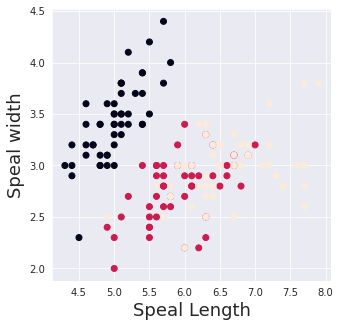

In [348]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['M'], df1['N'], c=iris.target,alpha=19)
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Speal width', fontsize=18)
plt.show()

***After apply K-means clustering***

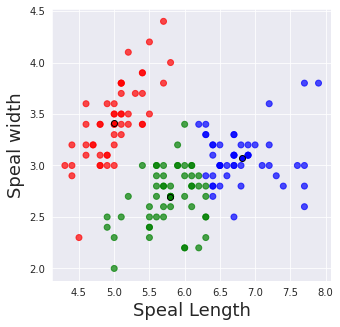

In [363]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.7)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Speal width', fontsize=18)
plt.show()